# The overlapping generations model

Imports relevant packages:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# Model description

Below is a description of the OLG-model. We describe the properties and assumptions of the chosen model.

In this model, time is discrete and indexed by $$t\in\{0,1,\dots\}$$

The population grows at a positive rate, $n$. The population thus changes over time according to: $$L_t=L_{t-1}(1+n)$$

The agents derive utility from consumption the following way: $$U =u(c_{1,t})+\frac{1}{1+\rho}u(c_{2,t+1}),\quad \rho>-1$$
Consumption as young and old are denoted by $c_{1,t}$ and $c_{2,t+1}$. Agents discount the future by the discount rate, $\rho$. Furthermore, we assume that the utility of consumption is logarithmic, $u(c)=ln(c)$.

The agents live for two periods. In the first, they supply one unit of labour inelastically at the wage rate, $w_t$. Then they chose their consumption and savings levels. In the second period, the agents are now old and retired. They live off their their gross savings from the first period. Since the agents do not live for another period, they will not save. The budget constraints for the first and second period respectively are therefore:


$$c_{1,t}=w_{t}-s_t \\$$
$$c_{2,t+1}=s_{t}(1+r_{t+1})$$

We can thus derive the lifetime budget constraint:

$$w_t=c_{1,t}+\frac{c_{2,t+1}}{1+r_{t+1}}$$



Lastly, we assume that the production function is a standard Cobb-Douglas: 

$$Y_t(K_t,L_t)=K_t^\alpha L_t^{1-\alpha}$$


# Analytical solution

We need to define the variables, which we will be using for this analytical solution. We need to define the variables using sympy.

In [2]:
#Defining variables
alpha = sm.symbols('alpha')
c1 = sm.symbols('c_1t')
c2 = sm.symbols('c_2t+1')
K = sm.symbols('K_t')
k = sm.symbols('k_t')
k1 = sm.symbols('k_t+1')
kstar = sm.symbols('k^*')
lamb = sm.symbols('lambda')
L = sm.symbols('L_t')
n = sm.symbols('n')
rho = sm.symbols('rho')
rt = sm.symbols('r_t')
rt1 = sm.symbols('r_t+1')
st = sm.symbols('s_t')
wt = sm.symbols('w_t')
Y = sm.symbols('Y')
t = sm.symbols('t')

## The household's problem

We start by solving the household's problem. To do so we need to set up our model.

In [3]:
#Setting up the utility function
uc1 = sm.ln(c1)
uc2 = sm.ln(c2)
U = uc1 + 1/(1+rho) * uc2


#Setting up the three budget constraints (period 1, period 2 and the lifetime budget constraint).
bc1 = wt-st
bc2 = (1+rt1)*st 
bc = c1 + c2 / (1+rt1) - wt 

We chose to solve this maximisation by using the Lagrange method.

In [4]:
#Setting up the Lagrangian
Lagrange = U-lamb*bc
Lagrange

-lambda*(c_1t + c_2t+1/(r_t+1 + 1) - w_t) + log(c_1t) + log(c_2t+1)/(rho + 1)

In [5]:
#First order conditions w.r.t. to c1 and c2 respectively
FOC_c1 = sm.Eq(0,sm.diff(Lagrange,c1))
FOC_c2 = sm.Eq(0,sm.diff(Lagrange,c2))

#Solving the two FOC's 
lamb1 = sm.solve(FOC_c1,lamb)[0]
lamb2 = sm.solve(FOC_c2,lamb)[0]

#Deriving the Euler equation by combining lamb1 and lamb2
euler = sm.Eq(lamb1, lamb2)
euler = sm.solve(euler,c1)[0]
euler = sm.Eq(c1,euler)
euler

Eq(c_1t, c_2t+1*(rho + 1)/(r_t+1 + 1))

The Euler equation essentially describes how an agent must be indifferent between consuming one more unit in the first period versus saving and consuming in the second period. We now want to derive the optimal savings rate. We do this by substituting the budget constraints into the Euler equation and solving for $s$.

In [6]:
#Substituting the budget constraint into the Euler equation
euler_temp = euler.subs(c1,bc1)
euler_new = euler_temp.subs(c2,bc2)

#Solving for s
optimal_savings = sm.solve(euler_new,st)[0]
optimal_savings = sm.Eq(st,optimal_savings)
optimal_savings

Eq(s_t, w_t/(rho + 2))

The optimal savings rate is a constant fraction of the wage rate and depends on the discount factor. We have now solved the model from the households perspective and will move on to the firms.

## Maximisation of the firms

The firms maximisation problem is
$$ max      K_{t}^{\alpha}L_{t}^{1-\alpha}-r_tK_t-w_tL_t$$

We solve the problem by finding the first order conditions with respect to $K_t$ and $L_t$:

In [7]:
#Setting up the production function 
Y = K**alpha * L**(1-alpha)

#Finding the interest rate 
d_yk = sm.diff(Y,K)
i_rate = sm.Eq(rt,d_yk)
i_rate = sm.simplify(i_rate)
i_rate

Eq(r_t, K_t**(alpha - 1)*L_t**(1 - alpha)*alpha)

In [8]:
#Finding wage rate
d_yl = sm.diff(Y,L) #Partial derivative
wage = sm.Eq(wt,d_yl)
wage_s = sm.simplify(wage)
wage_s

Eq(w_t, K_t**alpha*L_t**(-alpha)*(1 - alpha))

We now find the expressions in per worker terms. Where we utilise the definition: $$\frac{K}{L}=k$$

In [9]:
#Interest rate and wage rate per worker
irate_pw = sm.Eq(rt,(alpha*k**(alpha-1)))
wage_pw = sm.Eq(wt, ((1-alpha)*k**(alpha)))
display(irate_pw,wage_pw)

Eq(r_t, alpha*k_t**(alpha - 1))

Eq(w_t, k_t**alpha*(1 - alpha))

We have thus solved the firms problem in per worker terms.

## Steady state level of capital per worker

We can now use our previous findings to derive the steady state level of capital per worker. Capital accumulation is expressed like so:$$k_{t+1}(1+n)=s_t$$

The entire stock of capital in period $t+1$ comes from the savings in period $1$. We start by setting up the capital accumulation function. Thereafter we substitute the expression for the wage rate into optimal savings equation.

In [10]:
#Setting up the capital accumulation function
cap_acc = k1 *(1+n)

#Substituting the wage rate into the equation for optimal savings
optimal_savings_2 = optimal_savings.subs(wt, ((1-alpha)*k**(alpha)))

#Inserting the capital accumulation function into the optimal savings equation
cap_acc = optimal_savings_2.subs(st,cap_acc)

#Solving for k_t+1
cap_acc = sm.solve(cap_acc,k1) [0]
cap_acc = sm.Eq(k1,cap_acc)
cap_acc 

Eq(k_t+1, k_t**alpha*(1 - alpha)/(n*rho + 2*n + rho + 2))

Now we simply use the definition of a steady state, which implies $k_{t+1}=k_t=k^*$.

In [11]:
#Applying beforementioned definition
ss = cap_acc.subs(k1, kstar)
ss_cap = ss.subs(k, kstar)

#Solving for kstar 
ss_cap = sm.solve(ss_cap,kstar) [0]
ss_cap = sm.Eq(kstar,ss_cap)
ss_cap

Eq(k^*, ((-n*rho - 2*n - rho - 2)/(alpha - 1))**(1/(alpha - 1)))

Thus we have derived the steady state level of capita.

# Numerical solution

We will now solve this model numerically. We start by defining realistic parameter values. We select parameter values based on the prevailing theory. 

In [12]:
#Define parameter values
alpha = 1/3
n = 0.05
rho = 0.1

We will use an optimizer for this root finding problem. More specifically we will use the root_scalar. 

In [13]:
#Defining our objective function
obj_kss = lambda kstar: kstar - (kstar**alpha*(1-alpha))/(n*rho+2*n+rho+2)

#Optimizing the steady state function
result = optimize.root_scalar(obj_kss,bracket=[0.001,1000],method='brentq')

print('The numerical solution for the steady state level of capital per worker is: %0.4f' %result.root)

The numerical solution for the steady state level of capital per worker is: 0.1662


We can now plot the dynamics of the model in a transition diagram:

In [39]:
def transition(k,alpha,rho,n,t):
    w = k**alpha * (1-alpha)
    s = w / (rho+2)
    k1 = s / (n+1)
    return k1

def transition_diagram(alpha,rho,n,trans_fun,t):
    
    #Setting up grids
    k_1 = np.linspace(1e-20,6,1000)
    k_2 = np.empty(1000)
    
    #Constructing array
    for i,k in enumerate(k_1):
        k_plus = trans_fun(k,alpha,rho,n,t)
        k_2[i] = k_plus
        
    return k_1, k_2

#Plotting the graph
def fig(rho,trans_fun,t):
    k_1, k_2 = transition_diagram(alpha,rho,n,trans_fun,t)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(k_1,k_2)
    ax.plot(k_1,k_1, '--', color='grey')
    plt.text(0.6,0.26,'$k_{t+1}$')
    plt.text(0.6,0.6,'$k_t=k_{t+1}$')
    ax.set_xlabel('$k_t$')
    ax.set_ylabel('$k_{t+1}$')
    ax.set_title('Figure 1: Transition diagram')
    ax.set_xlim([0,0.6])
    ax.set_ylim([0,0.6]);
    ax.grid(True);
    return

#Adding widget for rho
import ipywidgets as widgets
widgets.interact(fig, 
    rho = widgets.FloatSlider(description='rho', min=-0.99, max=5, step=0.01, value=0.1),
    trans_fun = widgets.fixed(transition),
    t =widgets.fixed(t)
);

interactive(children=(FloatSlider(value=0.1, description='rho', max=5.0, min=-0.99, step=0.01), Output()), _do…

In [42]:
def transition_l_tax(k,alpha,rho,n,t):
    w = k**alpha * (1-alpha)
    s = w*(1-t) / (rho+2)
    k1 = s / (n+1)
    return k1


#Adding widget for rho
import ipywidgets as widgets
widgets.interact(fig, 
    rho = widgets.FloatSlider(description='rho', min=-0.99, max=5, step=0.01, value=0.1),
    trans_fun = widgets.fixed(transition_l_tax),
    t = widgets.FloatSlider(description='t', min=0, max=1, step=0.01, value=0.3),
);

interactive(children=(FloatSlider(value=0.1, description='rho', max=5.0, min=-0.99, step=0.01), FloatSlider(va…

In [50]:
alpha*0.1**(alpha-1)

1.5471962778709263

The steady state level is where the 45 degree line intersect the curve for $k_{t+1}$.

We are also interested in the agents allocation of consumption over time. Therefore, we create plot to show the consumption level in period 1 and 2 dependent on $\rho$.

In [51]:
def solve(alpha,n,rho):
    #Defining our objective function
    obj_kss = lambda kstar: kstar - (kstar**alpha*(1-alpha))/(n*rho+2*n+rho+2)

    #Optimizing the steady state function
    result = optimize.root_scalar(obj_kss,bracket=[0.001,1000],method='brentq')
    kss = result.root
    
    r = alpha*kss**(alpha-1)
    w = (1-alpha)*kss**(alpha)
    
    s = w/(rho+2)
    
    c1 = w-s
    c2 = s*(1+r)
    return [c1, c2, r]

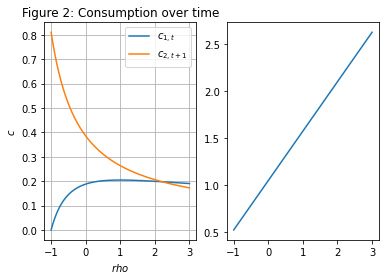

In [52]:
#Setting up grids
rho_space= np.linspace(-1,3,300)
c_vec = np.array([solve(alpha,n,rho) for rho in rho_space])

#Plotting the graph
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax.plot(rho_space,c_vec[:,0])
ax.plot(rho_space,c_vec[:,1])

ax2.plot(rho_space,c_vec[:,2])
ax.legend(['$c_{1,t}$','$c_{2,t+1}$'])
ax.set_xlabel('$rho$')
ax.set_ylabel('$c$')
ax.set_title('Figure 2: Consumption over time')
ax.grid(True);

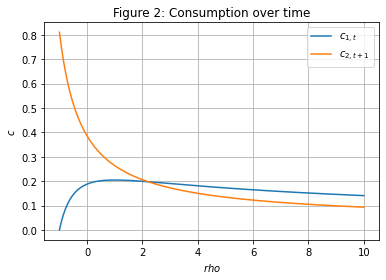

In [53]:
#Setting up grids
rho_space= np.linspace(-1,10,300)
c_vec = np.array([solve(alpha,n,rho) for rho in rho_space])

#Plotting the graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(rho_space,c_vec[:,0])
ax.plot(rho_space,c_vec[:,1])

ax.legend(['$c_{1,t}$','$c_{2,t+1}$'])
ax.set_xlabel('$rho$')
ax.set_ylabel('$c$')
ax.set_title('Figure 2: Consumption over time')
ax.grid(True);

In [19]:
def obj(rho,alpha,n):
    c1,c2 = solve(alpha,n,rho)
    return c1-c2

optimize.root_scalar(obj,bracket = (2,3),args= (alpha,n))

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 2.210526315810104

Unexpectedly, we can see that consumption in period 1 increases as $\rho$ increases. When the agents discount the future at $\rho=3$, then consumption in the first period is equal to consumption in the second.

# OLG-model with tax

## Tax on income

We will now implement a tax in the OLG-model. We will introduce the tax on income and on savings. All the tax revenue goes to the old agents. We start with the tax levied on income. The changes in the model is summarised below.

$c_{1,t}=w_{t}(1-t)-s_t$

Saving will therefore be: $s_t = \frac{w_t(1-t)}{\rho+2}$

The transistion function is: $k_{t+1} = \frac{k_t^{\alpha} (1- \alpha)(1-t)}{n \rho + 2n + \rho + 2}$

We start by setting the tax:

In [44]:
#Define parameter values
t = 0.3

In [45]:
def transition(k,alpha,rho,t,n):
    w = k**alpha * (1-alpha)
    s = w*(1-t) / (rho+2)
    k1 = s / (n+1)
    return k1

def transition_diagram(alpha,rho,t,n):
    
    #Setting up grids
    k_1 = np.linspace(1e-20,6,1000)
    k_2 = np.empty(1000)
    
    #Constructing array
    for i,k in enumerate(k_1):
        k_plus = transition(k,alpha,rho,t,n)
        k_2[i] = k_plus
        
    return k_1, k_2

#Plotting the graph
def fig(t,rho):
    k_1, k_2 = transition_diagram(alpha,t,rho,n)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(k_1,k_2)
    ax.plot(k_1,k_1, '--', color='grey')
    plt.text(0.6,0.18,'$k_{t+1}$')
    plt.text(0.6,0.6,'$k_t=k_{t+1}$')
    ax.set_xlabel('$k_t$')
    ax.set_ylabel('$k_{t+1}$')
    ax.set_title('Figure 3: Transition diagram')
    ax.set_xlim([0,0.6])
    ax.set_ylim([0,0.6]);
    return

#Adding widget for rho
import ipywidgets as widgets
widgets.interact(fig,                
    t = widgets.FloatSlider(description='t', min=0, max=1, step=0.01, value=0.3),
    rho = widgets.FloatSlider(description='rho', min=-0.99, max=5, step=0.01, value=0.1),
);

interactive(children=(FloatSlider(value=0.3, description='t', max=1.0, step=0.01), FloatSlider(value=0.1, desc…

Unsurprisingly the steady state level of capital per worker decreases as the tax is introduced, although slightly.

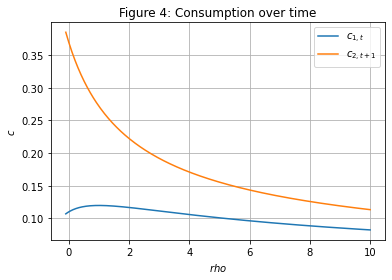

In [65]:
def solve(alpha,n,rho):
    #Defining our objective function
    obj_kss = lambda kstar: kstar - (kstar**alpha*(1-alpha)*(1-t))/(n*rho+2*n+rho+2)

    #Optimizing the steady state function
    result = optimize.root_scalar(obj_kss,bracket=[0.001,1000],method='brentq')
    kss = result.root
    
    r = alpha*kss**(alpha-1)
    w = (1-alpha)*kss**(alpha)
    
    s = w*(1-t)/(rho+2)
    
    c1 = w*(1-t)-s
    c2 = s*(1+r)+w*t
    return [c1, c2]

#Setting up grids
rho_space= np.linspace(-0.1,10,300)
c_vec = np.array([solve(alpha,n,rho) for rho in rho_space])

#Plotting the graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(rho_space,c_vec[:,0])
ax.plot(rho_space,c_vec[:,1])
ax.legend(['$c_{1,t}$','$c_{2,t+1}$'])
ax.set_xlabel('$rho$')
ax.set_ylabel('$c$')
ax.set_title('Figure 4: Consumption over time')
ax.grid(True);

When the income tax is introduced, the difference in consumption in the two periods increases. The two curves intersects eachother at $\rho=15$, which seem quite unrealistic. 

## Tax on savings

Now we consider the tax on savings. The changes can be summarised to:

$c_{1,t}=w_{t}-s_t(1+t)$

Saving will therefore be: $s_t = \frac{w_t}{(\rho+2)(1+t)}$

The transistion function is: $k_{t+1} = \frac{k_t^{\alpha} (1- \alpha)}{(n \rho + 2n + \rho + 2)(1+t)}$

We will now conduct the same methods as previous.

In [66]:
def transition(k,alpha,rho,t,n):
    w = k**alpha * (1-alpha)
    s = w / ((rho+2)*(1+t))
    k1 = s / (n+1)
    return k1


def transition_diagram(alpha,rho,t,n):
    
    #Setting up grids
    k_1 = np.linspace(1e-20,6,1000)
    k_2 = np.empty(1000)
    
    #Constructing arrays
    for i,k in enumerate(k_1):
        k_plus = transition(k,alpha,rho,t,n)
        k_2[i] = k_plus
        
    return k_1, k_2

#Plotting figure
def fig(t,rho):
    k_1, k_2 = transition_diagram(alpha,rho,t,n)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(k_1,k_2)
    ax.plot(k_1,k_1, '--', color='grey')
    plt.text(0.6,0.23,'$k_{t+1}$')
    plt.text(0.6,0.6,'$k_t=k_{t+1}$')
    ax.set_xlabel('$k_t$')
    ax.set_ylabel('$k_{t+1}$')
    ax.set_title('Figure 5: Transition diagram')
    ax.set_xlim([0,0.6])
    ax.set_ylim([0,0.6]);
    return

#Adding widgets
import ipywidgets as widgets
widgets.interact(fig,                
    t = widgets.FloatSlider(description='t', min=0, max=1, step=0.01, value=0.3),
    rho = widgets.FloatSlider(description='rho', min=-0.99, max=5, step=0.01, value=0.1),
);

interactive(children=(FloatSlider(value=0.3, description='t', max=1.0, step=0.01), FloatSlider(value=0.1, desc…

The steady state level is less than the two previous levels due to the effect of a tax on savings. The interest from the savings is therefore also lower. These two effects thus decreases the steady state level of capital per worker by more than the income tax.

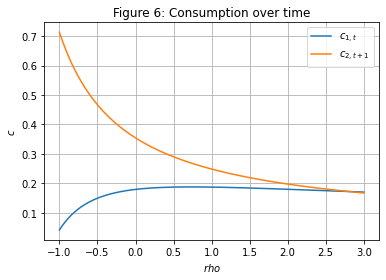

In [67]:
def solve(alpha,n,rho):
    #Defining our objective function
    obj_kss = lambda kstar: kstar - (kstar**alpha*(1-alpha))/((n*rho+2*n+rho+2)*(1+t))

    #Optimizing the steady state function
    result = optimize.root_scalar(obj_kss,bracket=[0.001,1000],method='brentq')
    kss = result.root
    
    r = alpha*kss**(alpha-1)
    w = (1-alpha)*kss**(alpha)
    
    s = w*(1-t)/(rho+2)
    
    c1 = w-s*(1+t)
    c2 = s*(1+t)*(1+r)
    return [c1, c2]

#Setting up grids
rho_space= np.linspace(-1,3,300)
c_vec = np.array([solve(alpha,n,rho) for rho in rho_space])

#Plotting the graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(rho_space,c_vec[:,0])
ax.plot(rho_space,c_vec[:,1])
ax.legend(['$c_{1,t}$','$c_{2,t+1}$'])
ax.set_xlabel('$rho$')
ax.set_ylabel('$c$')
ax.set_title('Figure 6: Consumption over time')
ax.grid(True);

With a tax on saving, consumption in period 2 becomes more expensive and therefore less attractive. This shows in figure 6.

# Conclusion

ADD CONCISE CONCLUSION.